<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300"></center><br/>

# Assignment: Notebook for Peer Assignment

Estimated time needed: 60 minutes


# Assignment Scenario

Congratulations! You have just been hired by a US Weather forecast firm as a data scientist.

The company is considering the weather condition to help predict the possibility of precipitations, which involves using various local climatological variables, including temperature, wind speed, humidity, dew point, and pressure. The data you will be handling was collected by a NOAA weather station located at the John F. Kennedy International Airport in Queens, New York.

Your task is to provide a high level analysis of weather data in JFK Airport. Your stakeholders want to understand the current and historical record of precipitations based on different variables. For now they are mainly interested in a macro-view of JFK Airport Weather, and how it relates to the possibility to rain because it will affect flight delays and etc.


# Introduction

This project relates to the NOAA Weather Dataset - JFK Airport (New York). The original dataset contains 114,546 hourly observations of 12 local climatological variables (such as temperature and wind speed) collected at JFK airport. This dataset can be obtained for free from the IBM Developer [Data Asset Exchange](https://developer.ibm.com/exchanges/data/all/jfk-weather-data/).

For this project, you will be using a subset dataset, which contains 5727 rows (about 5% or original rows) and 9 columns. The end goal will be to predict the precipitation using some of the available features. In this project, you will practice reading data files, preprocessing data, creating models, improving models and evaluating them to ultimately choose the best model.




## Table of Contents:

Using this R notebook you will complete **10 tasks**:
* [0. Import Modules](#cell0)
* [1. Download and Unzip NOAA Weather Dataset](#cell1)
* [2. Read Dataset into Project](#cell2)
* [3. Select Subset of Columns](#cell3)
* [4. Clean Up Columns](#cell4)
* [5. Convert Columns to Numerical Types](#cell5)
* [6. Rename Columns](#cell6)
* [7. Exploratory Data Analysis](#cell7)
* [8. Linear Regression](#cell8)
* [9. Improve the Model](#cell9)
* [10. Find Best Model](#cell10)


<a id="cell0"></a>
## 0. Import required modules

Tidymodels is a collection of packages that use tidyverse principles to easily do the entire modeling process from preprocessing initial data, to creating a model, to tunning hyperparameters. The tidymodels packages can be used to produce high quality statistical and machine learning models. Our Jupyter notebook platforms have a built-in Tidyverse, Tidymodels and rlang packages so we do not need to install these packages prior to loading library. However, if you decide to run this lab on your RStudio Desktop locally on your machine, you can remove the commented lines of code to install these packages before loading.



In [5]:
install.packages("rlang")
install.packages("tidymodels")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘warp’, ‘future.apply’, ‘iterators’, ‘listenv’, ‘parallelly’, ‘lhs’, ‘DiceDesign’, ‘sfd’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘doFuture’, ‘foreach’, ‘future’, ‘GPfit’, ‘modelenv’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’




In [37]:
# Install glmnet package
install.packages("glmnet")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




**Note: After installing the packages, restart the kernel. Without installing the packages again, load them. Tidyverse and Tidymodels will be the two main packages you will use.**


In [1]:
# Library for modeling
library(tidymodels)

# Load tidyverse
library(tidyverse)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.4     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conf


### Understand the Dataset

The original NOAA JFK dataset contains 114,546 hourly observations of various local climatological variables (including temperature, wind speed, humidity, dew point, and pressure).

In this project you will use a sample dataset, which is around 293 KB. [Link to the sample dataset](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz).

The sample contains 5727 rows (about 5% or original rows) and 9 columns, which are:
- DATE
- HOURLYDewPointTempF
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYWETBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYSeaLevelPressure
- HOURLYStationPressure

The original dataset is much bigger. Feel free to explore the original dataset. [Link to the original dataset.](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa_weather.html)

For more information about the dataset, checkout the [preview](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/data-preview/index.html?_ga=2.176781478.281508226.1616293518-1509963377.1616117067&cm_mc_uid=90945889198916153255549&cm_mc_sid_50200000=64650651616293516933) of NOAA Weather - JFK Airport.


<a id="cell1"></a>

## 1. Download NOAA Weather Dataset

Use the `download.file()` function to download the sample dataset from the URL below.

URL = 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'


In [2]:
# Define the URL for the dataset
URL <- 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'

# Specify the destination file path
dest_file <- "noaa-weather-sample-data.tar.gz"

# Download the file
download.file(URL, destfile = dest_file)

# Print success message
cat("File downloaded successfully to:", dest_file, "\n")


File downloaded successfully to: noaa-weather-sample-data.tar.gz 


Untar the zipped file.


In [3]:
# Extract the downloaded file
untar(dest_file, exdir = "noaa-weather-data")

# Print success message
cat("File extracted to the directory: noaa-weather-data\n")


File extracted to the directory: noaa-weather-data


<a id="cell2"></a>
## 2. Extract and Read into Project
We start by reading in the raw dataset. You should specify the file name as "noaa-weather-sample-data/jfk_weather_sample.csv".


In [4]:
# Define the correct file path after extraction
file_path <- "noaa-weather-data/noaa-weather-sample-data/jfk_weather_sample.csv"

# Read the CSV file into a data frame
weather_data <- read.csv(file_path, stringsAsFactors = FALSE)



Next, display the first few rows of the dataframe.


In [5]:
# Display the first few rows of the dataframe
head(weather_data)


,DATE,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYStationPressure
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>
1,2015-07-25T13:51:00Z,60,46,83,68,0.00,13,30.01,29.99
2,2016-11-18T23:51:00Z,34,48,53,44,0.00,6,30.05,30.03
3,2013-01-06T08:51:00Z,33,89,36,35,0.00,13,30.14,30.12
4,2011-01-27T16:51:00Z,18,48,36,30,0.00,14,29.82,29.80
5,2015-01-03T12:16:00Z,27,61,39,34,T,11,NA,30.50
6,2013-02-15T20:51:00Z,35,79,41,38,0.00,6,29.94,29.92


Also, take a `glimpse` of the dataset to see the different column data types and make sure it is the correct subset dataset with about 5700 rows and 9 columns.


In [6]:
# Check the structure of the dataset to view column names and data types
str(weather_data)

# Confirm the dataset dimensions (rows and columns)
dim(weather_data)

'data.frame':	5727 obs. of  9 variables:
 $ DATE                  : chr  "2015-07-25T13:51:00Z" "2016-11-18T23:51:00Z" "2013-01-06T08:51:00Z" "2011-01-27T16:51:00Z" ...
 $ HOURLYDewPointTempF   : chr  "60" "34" "33" "18" ...
 $ HOURLYRelativeHumidity: int  46 48 89 48 61 79 51 65 90 94 ...
 $ HOURLYDRYBULBTEMPF    : int  83 53 36 36 39 41 19 24 54 73 ...
 $ HOURLYWETBULBTEMPF    : int  68 44 35 30 34 38 15 21 52 72 ...
 $ HOURLYPrecip          : chr  "0.00" "0.00" "0.00" "0.00" ...
 $ HOURLYWindSpeed       : int  13 6 13 14 11 6 0 11 11 5 ...
 $ HOURLYSeaLevelPressure: num  30 30.1 30.1 29.8 NA ...
 $ HOURLYStationPressure : num  30 30 30.1 29.8 30.5 ...


[1] 5727    9

<a id="cell3"></a>
## 3. Select Subset of Columns

The end goal of this project will be to predict `HOURLYprecip` (precipitation) using a few other variables. Before you can do this, you first need to preprocess the dataset. Section 3 to section 6 focuses on preprocessing.

The first step in preprocessing is to select a subset of data columns and inspect the column types.

The key columns that we will explore in this project are:
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYStationPressure

Data Glossary:
- 'HOURLYRelativeHumidity' is the relative humidity given to the nearest whole percentage.
- 'HOURLYDRYBULBTEMPF' is the dry-bulb temperature and is commonly used as the standard air temperature reported. It is given here in whole degrees Fahrenheit.
- 'HOURLYPrecip' is the amount of precipitation in inches to hundredths over the past hour. For certain automated stations, precipitation will be reported at sub-hourly intervals (e.g. every 15 or 20 minutes) as an accumulated amount of all precipitation within the preceding hour. A “T” indicates a trace amount of precipitation.
- 'HOURLYWindSpeed' is the speed of the wind at the time of observation given in miles per hour (mph).
- 'HOURLYStationPressure' is the atmospheric pressure observed at the station during the time of observation. Given in inches of Mercury (in Hg).

`Select` those five columns and store the modified dataframe as a new variable.


In [7]:
# Select the specified columns
selected_columns <- c("HOURLYRelativeHumidity",
                      "HOURLYDRYBULBTEMPF",
                      "HOURLYPrecip",
                      "HOURLYWindSpeed",
                      "HOURLYStationPressure")

# Create a new dataframe with the selected columns
weather_data_subset <- weather_data[, selected_columns]

# Display the structure of the new dataframe to inspect column types
str(weather_data_subset)



'data.frame':	5727 obs. of  5 variables:
 $ HOURLYRelativeHumidity: int  46 48 89 48 61 79 51 65 90 94 ...
 $ HOURLYDRYBULBTEMPF    : int  83 53 36 36 39 41 19 24 54 73 ...
 $ HOURLYPrecip          : chr  "0.00" "0.00" "0.00" "0.00" ...
 $ HOURLYWindSpeed       : int  13 6 13 14 11 6 0 11 11 5 ...
 $ HOURLYStationPressure : num  30 30 30.1 29.8 30.5 ...


Show the first 10 rows of this new dataframe.


In [8]:
# Display the first few rows to verify the selection
head(weather_data_subset, 10)

,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
,<int>,<int>,<chr>,<int>,<dbl>
1,46,83,0.00,13,29.99
2,48,53,0.00,6,30.03
3,89,36,0.00,13,30.12
4,48,36,0.00,14,29.80
5,61,39,T,11,30.50
6,79,41,0.00,6,29.92
7,51,19,0.00,0,30.40
8,65,24,0.00,11,30.35
9,90,54,0.06,11,30.03


<a id="cell4"></a>
## 4. Clean Up Columns

From the dataframe preview above, we can see that the column `HOURLYPrecip` - which is the hourly measure of precipitation levels - contains both `NA` and `T` values. `T` specifies *trace amounts of precipitation* (meaning essentially no precipitation), while `NA` means *not available*, and is used to denote missing values. Additionally, some values also have "s" at the end of them, indicating that the precipitation was snow.

Inspect the unique values present in the column `HOURLYPrecip` (with `unique(dataframe$column)`) to see these values.


In [9]:
# Inspect unique values in the HOURLYPrecip column
unique(weather_data_subset$HOURLYPrecip)


[1] "0.00"  "T"     "0.06"  NA      "0.03"  "0.02"  "0.08"  "0.01"  "0.07" 
[10] "0.16"  "0.09"  "0.22"  "0.02s" "0.24"  "0.18"  "0.05"  "0.04"  "0.09s"
[19] "0.11"  "0.14"  "0.25"  "0.10"  "0.01s" "0.58"  "0.12"  "0.13"  "0.46" 
[28] "1.07"  "1.19"  "0.34"  "0.20"  "0.36s" "0.42"  "0.17"  "0.27"  "0.35" 
[37] "0.31"  "0.33"  "0.23"  "0.26"  "0.28"  "0.75"  "0.19"  "0.36"  "0.03s"
[46] "0.07s" "0.54"  "0.59"  "0.21"

Having characters in values (like the "T" and "s" that you see in the unique values) will cause problems when you create a model because values for precipitation should be numerical. So you need to fix these values that have characters.

Now, for the column `HOURLYPrecip`:
1. Replace all the `T` values with "0.0" and
2. Remove "s" from values like "0.02s". In R, you can use the method `str_remove(column, pattern = "s$")` to remove the character "s" from the end of values. The "$" tells R to match to the end of values. The `pattern` is a regex pattern. Look at [here](https://www.rdocumentation.org/packages/stringi/versions/1.5.3/topics/about_search_regex) for more information about regex and matching to strings in R.

Remember that you can use `tidyverse`'s  `mutate()` to update columns.

You can check your work by checking if unique values of `HOURLYPrecip` still contain any `T` or `s`. Store the modified dataframe as a new variable.


In [10]:
 #Create a modified dataframe with the cleaned HOURLYPrecip column
weather_data_clean <- weather_data_subset %>%
  mutate(
    # Replace "T" with "0.0"
    HOURLYPrecip = ifelse(HOURLYPrecip == "T", "0.0", HOURLYPrecip),
    # Remove "s" from values ending with "s"
    HOURLYPrecip = str_remove(HOURLYPrecip, pattern = "s$")
  ) %>%
  # Convert HOURLYPrecip to numeric
  mutate(HOURLYPrecip = as.numeric(HOURLYPrecip)) %>%
  # Replace NA with the mean of HOURLYPrecip
  mutate(HOURLYPrecip = ifelse(is.na(HOURLYPrecip), mean(HOURLYPrecip, na.rm = TRUE), HOURLYPrecip))

# Check unique values to ensure cleaning
unique(weather_data_clean$HOURLYPrecip)

[1] 0.000000000 0.060000000 0.006547824 0.030000000 0.020000000 0.080000000
 [7] 0.010000000 0.070000000 0.160000000 0.090000000 0.220000000 0.240000000
[13] 0.180000000 0.050000000 0.040000000 0.110000000 0.140000000 0.250000000
[19] 0.100000000 0.580000000 0.120000000 0.130000000 0.460000000 1.070000000
[25] 1.190000000 0.340000000 0.200000000 0.360000000 0.420000000 0.170000000
[31] 0.270000000 0.350000000 0.310000000 0.330000000 0.230000000 0.260000000
[37] 0.280000000 0.750000000 0.190000000 0.540000000 0.590000000 0.210000000

<a id="cell5"></a>
## 5. Convert Columns to Numerical Types
Now that you have removed the characters in the `HOURLYPrecip` column, you can safely covert the column to a numeric type.

First, check the types of the columns. You will notice that all are `dbl` (double or numeric) except for `HOURLYPrecip`, which is `chr` (character or string). Use the `glimpse` function from Tidyverse.


In [11]:
# Use glimpse to inspect the column types
glimpse(weather_data_clean)

Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <int> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <int> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYPrecip           <dbl> 0.000000000, 0.000000000, 0.000000000, 0.000000…
$ HOURLYWindSpeed        <int> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


Convert `HOURLYPrecip` to the `numeric` type and store the cleaned dataframe as a new variable.


In [12]:
# Convert HOURLYPrecip to numeric type and store the cleaned dataframe
weather_data_final <- weather_data_clean %>%
  mutate(HOURLYPrecip = as.numeric(HOURLYPrecip))



We can now see that all fields have numerical data type.


In [13]:
# Confirm that HOURLYPrecip is now numeric
glimpse(weather_data_final)



Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <int> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <int> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYPrecip           <dbl> 0.000000000, 0.000000000, 0.000000000, 0.000000…
$ HOURLYWindSpeed        <int> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


<a id="cell6"></a>
## 6. Rename Columns
Let's rename the following columns as:
- 'HOURLYRelativeHumidity' to 'relative_humidity'
- 'HOURLYDRYBULBTEMPF' to 'dry_bulb_temp_f'
- 'HOURLYPrecip' to 'precip'
- 'HOURLYWindSpeed' to 'wind_speed'
- 'HOURLYStationPressure' to 'station_pressure'

You can use `dplyr::rename()`. Then, store the final dataframe as a new variable.


In [14]:
# Rename the columns and store the final dataframe
weather_data_renamed <- weather_data_final %>%
  rename(
    relative_humidity = HOURLYRelativeHumidity,
    dry_bulb_temp_f = HOURLYDRYBULBTEMPF,
    precip = HOURLYPrecip,
    wind_speed = HOURLYWindSpeed,
    station_pressure = HOURLYStationPressure
  )

# Inspect the renamed dataframe
glimpse(weather_data_renamed)


Rows: 5,727
Columns: 5
$ relative_humidity <int> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37, 72, …
$ dry_bulb_temp_f   <int> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44, 57, …
$ precip            <dbl> 0.000000000, 0.000000000, 0.000000000, 0.000000000, …
$ wind_speed        <int> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, 8, 3,…
$ station_pressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40, 30.…


<a id="cell7"></a>
## 7. Exploratory Data Analysis
Now that you have finished preprocessing the dataset, you can can start exploring the columns more.

First, split the data into a training and testing set. Splitting a dataset is done randomly, so to have reproducible results set the seed = 1234. Also, use 80% of the data for training.


In [15]:
# Set the seed for reproducibility
set.seed(1234)

# Generate random indices for 80% of the data
train_indices <- sample(seq_len(nrow(weather_data_renamed)), size = 0.8 * nrow(weather_data_renamed))

# Create training and testing datasets
training_set <- weather_data_renamed[train_indices, ]
testing_set <- weather_data_renamed[-train_indices, ]

# Check the dimensions of the training and testing sets
cat("Training set dimensions:", dim(training_set), "\n")
cat("Testing set dimensions:", dim(testing_set), "\n")


Training set dimensions: 4581 5 
Testing set dimensions: 1146 5 


In [26]:
# Identify columns with missing values
colSums(is.na(training_set))
training_set <- training_set %>%
  mutate(
    across(everything(), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .))
  )


relative_humidity   dry_bulb_temp_f            precip        wind_speed 
                0                 0                 0                 0 
 station_pressure  dry_bulb_temp_f2 
                0                 0

Next, looking at just the **training set**, plot histograms or box plots of the variables (`relative_humidity`, `dry_bulb_temp_f`, `precip`, `wind_speed`,  `station_pressure`) for an intial look of their distributions using `tidyverse`'s `ggplot`. Leave the testing set as is because it is good practice to not see the testing set until evaluating the final model.


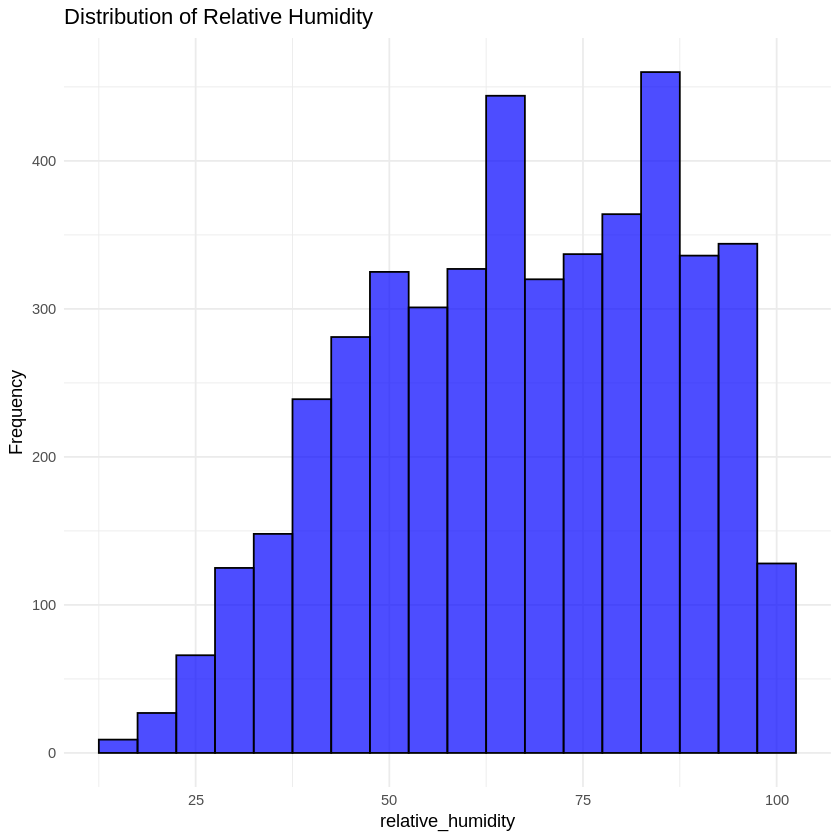

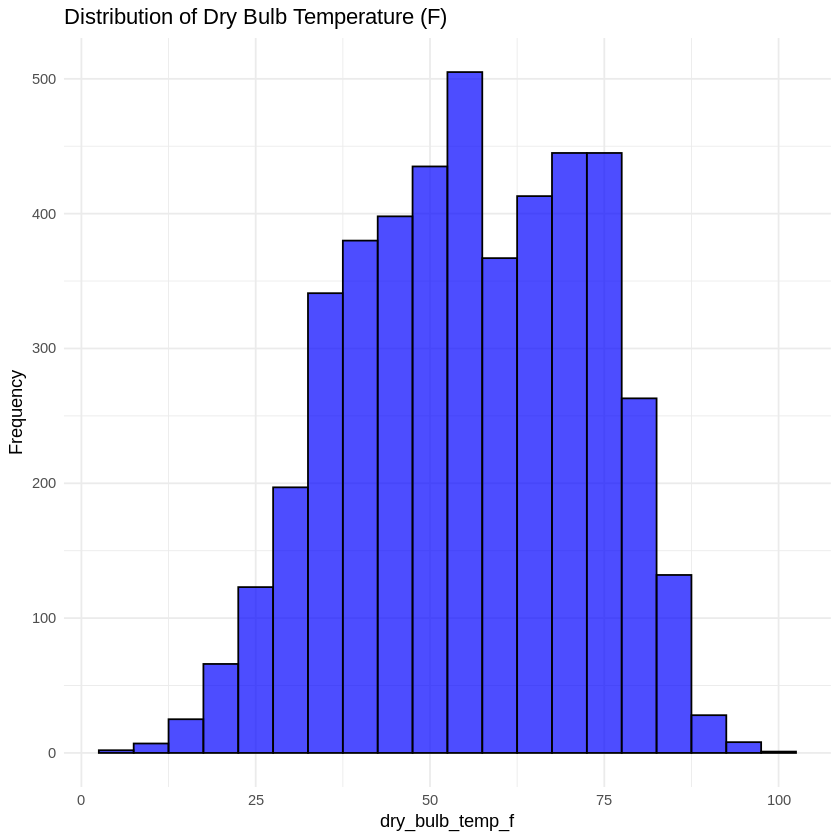

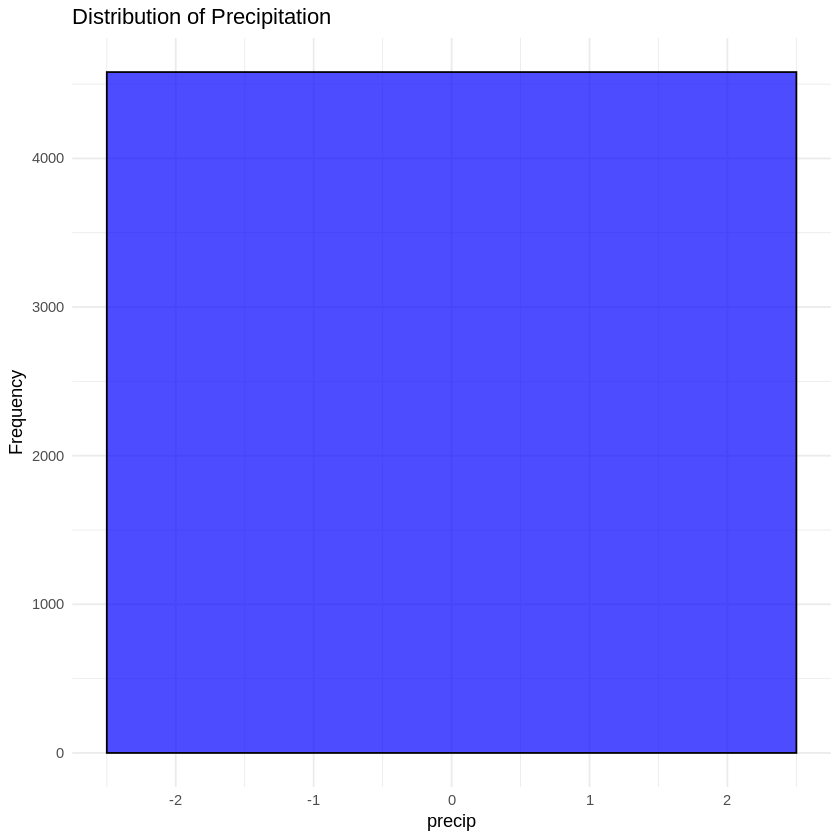

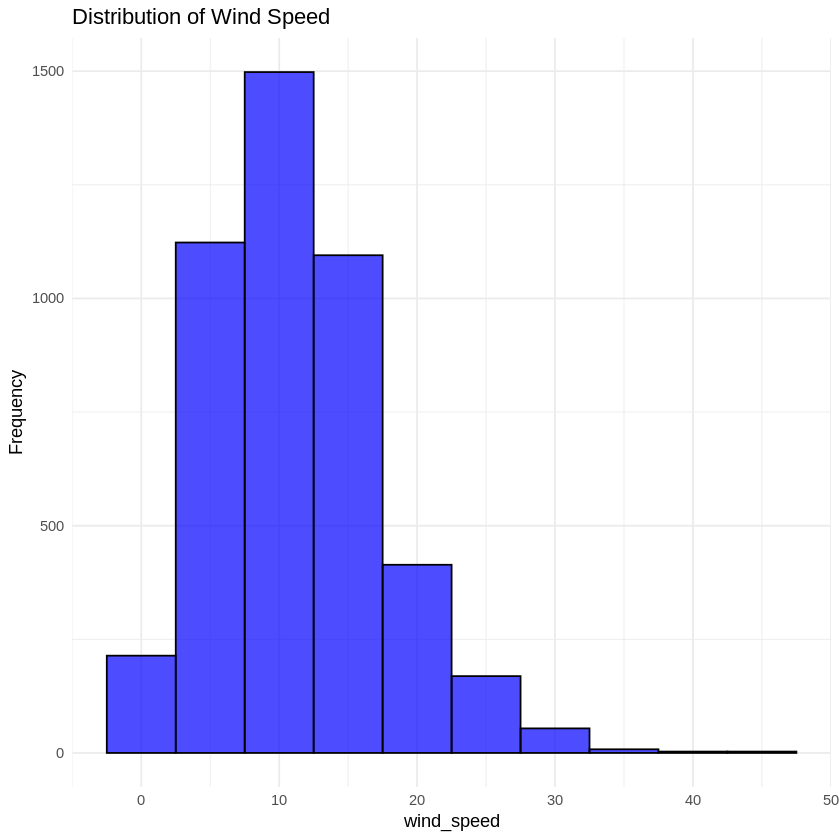

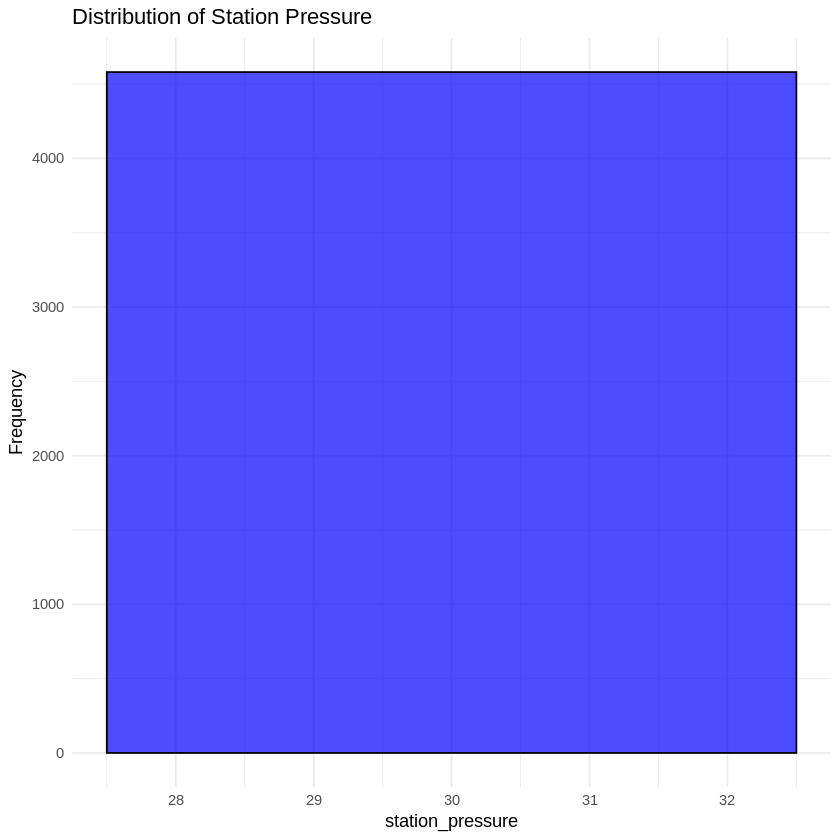

In [27]:
# Function to create histograms for each variable
plot_histogram <- function(data, column, title) {
  ggplot(data, aes(x = !!sym(column))) +
    geom_histogram(binwidth = 5, fill = "blue", color = "black", alpha = 0.7) +
    theme_minimal() +
    labs(title = title, x = column, y = "Frequency")
}

# Plot histograms for the selected variables
plot_histogram(training_set, "relative_humidity", "Distribution of Relative Humidity")
plot_histogram(training_set, "dry_bulb_temp_f", "Distribution of Dry Bulb Temperature (F)")
plot_histogram(training_set, "precip", "Distribution of Precipitation")
plot_histogram(training_set, "wind_speed", "Distribution of Wind Speed")
plot_histogram(training_set, "station_pressure", "Distribution of Station Pressure")

<a id="cell8"></a>
## 8. Linear Regression
After exploring the dataset more, you are now ready to start creating models to predict the precipitation (`precip`).

Create simple linear regression models where `precip` is the response variable and each of `relative_humidity`, `dry_bulb_temp_f`,`wind_speed` or `station_pressure` will be a predictor variable, e.g. `precip ~ relative_humidity`, `precip ~ dry_bulb_temp_f`, etc. for a total of four simple models.
Additionally, visualize each simple model with a scatter plot.


In [28]:
# Function to fit a linear regression model and visualize it
fit_and_plot <- function(data, response, predictor) {
  # Fit the linear regression model
  formula <- as.formula(paste(response, "~", predictor))
  model <- lm(formula, data = data)

  # Print the model summary
  print(summary(model))

  # Create scatter plot with regression line
  ggplot(data, aes(x = !!sym(predictor), y = !!sym(response))) +
    geom_point(alpha = 0.6) +
    geom_smooth(method = "lm", color = "blue", se = FALSE) +
    theme_minimal() +
    labs(
      title = paste("Scatter Plot and Regression Line:", response, "vs.", predictor),
      x = predictor,
      y = response
    )
}


In [29]:
# Apply the function to each predictor variable
plot1 <- fit_and_plot(training_set, "precip", "relative_humidity")
plot2 <- fit_and_plot(training_set, "precip", "dry_bulb_temp_f")
plot3 <- fit_and_plot(training_set, "precip", "wind_speed")
plot4 <- fit_and_plot(training_set, "precip", "station_pressure")


Call:
lm(formula = formula, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.01616 -0.00802 -0.00366  0.00069  1.17500 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.290e-02  1.877e-03   -6.87 7.26e-12 ***
relative_humidity  2.906e-04  2.691e-05   10.80  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.036 on 4579 degrees of freedom
Multiple R-squared:  0.02483,	Adjusted R-squared:  0.02462 
F-statistic: 116.6 on 1 and 4579 DF,  p-value: < 2.2e-16


Call:
lm(formula = formula, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00758 -0.00672 -0.00617 -0.00013  1.18316 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)     5.216e-03  1.860e-03   2.804  0.00506 **
dry_bulb_temp_f 2.388e-05  3.205e-05   0.745  0.45626   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual sta

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


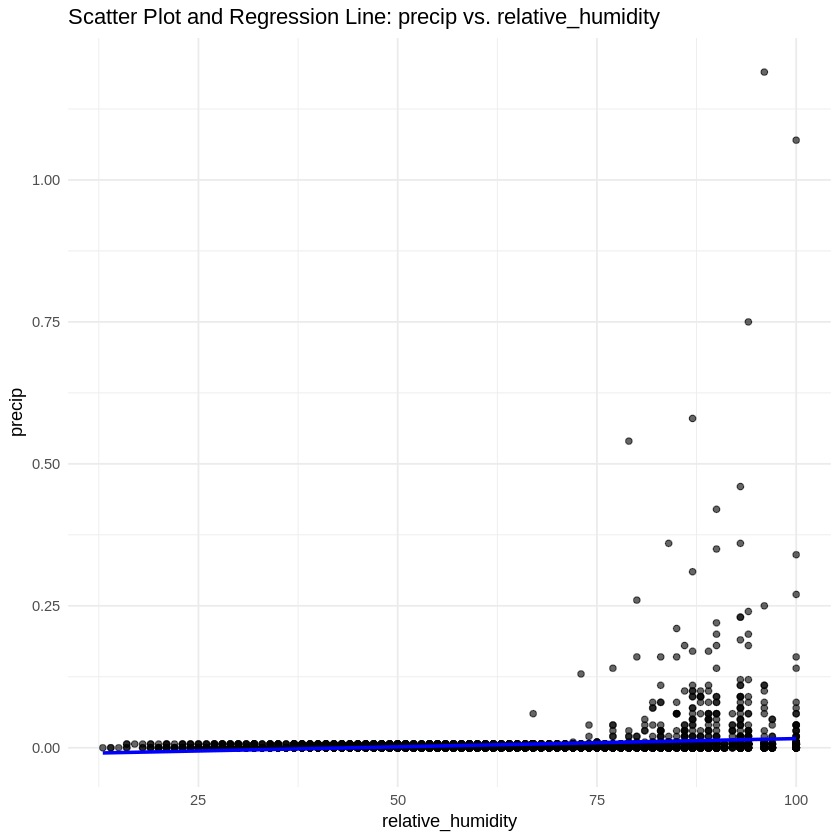

`geom_smooth()` using formula = 'y ~ x'


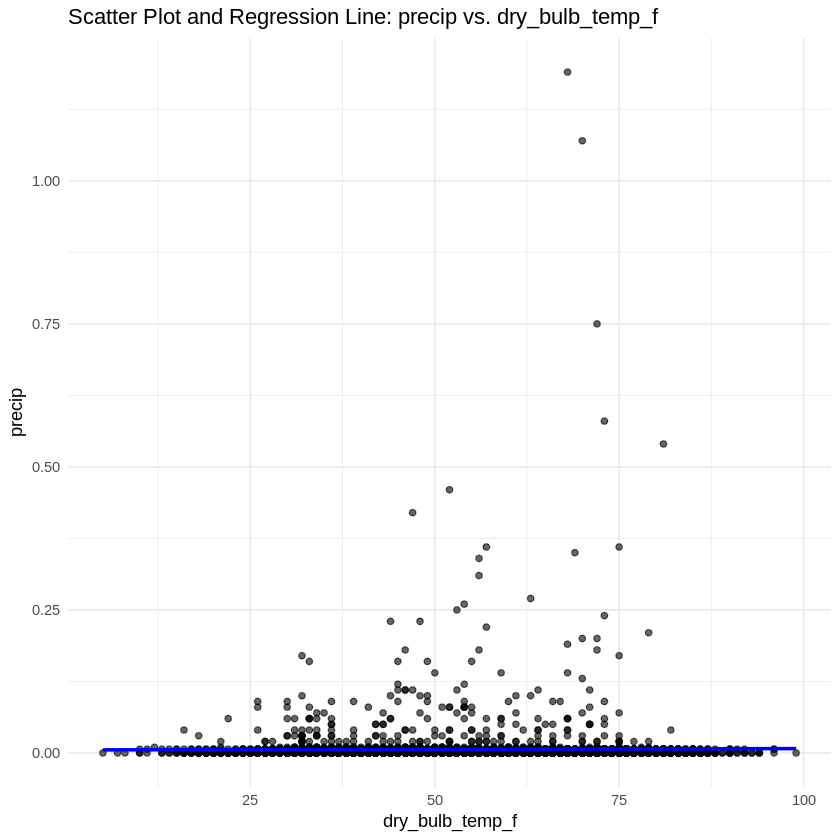

`geom_smooth()` using formula = 'y ~ x'


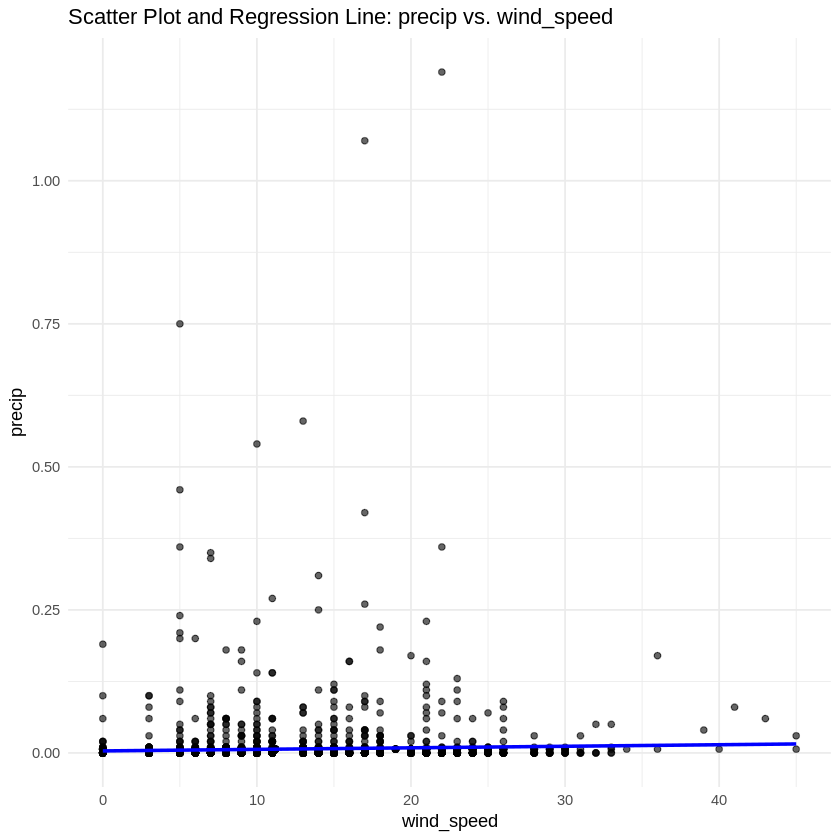

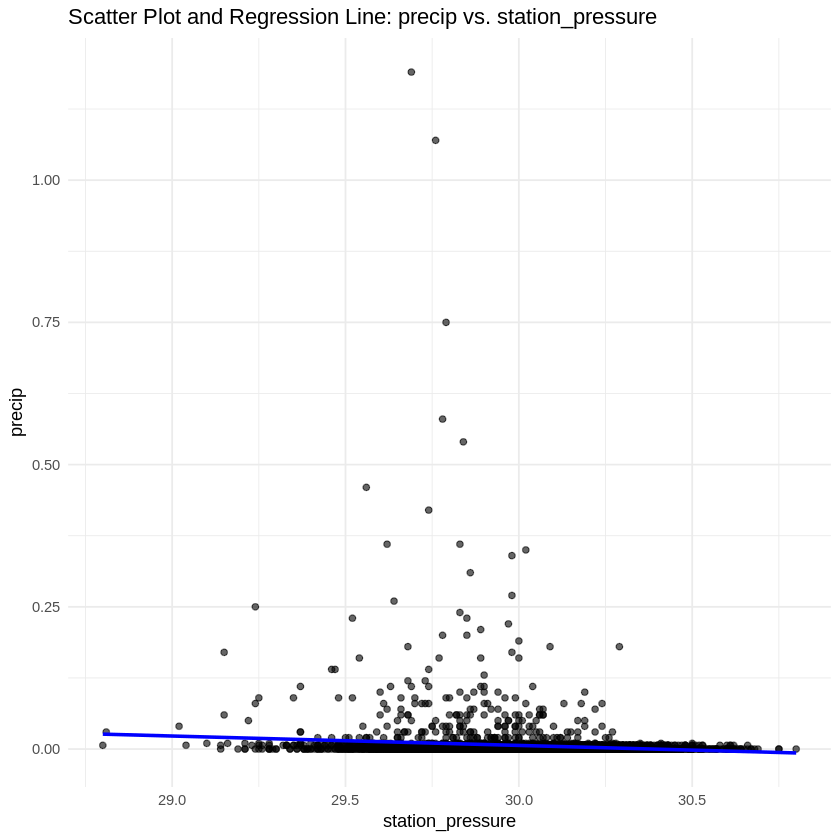

In [30]:
# Display the plots
print(plot1)
print(plot2)
print(plot3)
print(plot4)

<a id="cell9"></a>
## 9. Improve the Model
Now, try improving the simple models you created in the previous section.

Create at least two more models, each model should use at least one of the different techniques:
1. Add more features/predictors
2. Add regularization (L1, L2 or a mix)
3. Add a polynomial component

Also, for each of the models you create, check the model performance using the **training set** and a metric like MSE, RMSE, or R-squared.

Consider using `tidymodels` if you choose to add regularization and tune lambda.


In [33]:
# Model 1: Multiple Linear Regression
model1 <- lm(precip ~ relative_humidity + dry_bulb_temp_f + wind_speed + station_pressure, data = training_set)

# Evaluate Model 1 Performance on Training Set
model1_summary <- summary(model1)

# Calculate metrics
model1_r_squared <- model1_summary$r.squared
model1_rmse <- sqrt(mean(model1$residuals^2)) # RMSE
model1_mae <- mean(abs(model1$residuals)) # MAE

# Print metrics
cat("Model 1 R-squared:", model1_r_squared, "\n")
cat("Model 1 RMSE:", model1_rmse, "\n")
cat("Model 1 MAE:", model1_mae, "\n")


Model 1 R-squared: 0.03431418 
Model 1 RMSE: 0.03581975 
Model 1 MAE: 0.009494177 


In [32]:


# Create a recipe
recipe <- recipe(precip ~ relative_humidity + dry_bulb_temp_f + wind_speed + station_pressure, data = training_set)

# Model 2: Ridge Regression (L2 Regularization)
ridge_spec <- linear_reg(penalty = 0.1, mixture = 0) %>%  # L2 regularization
  set_engine("glmnet")

# Fit the model
ridge_workflow <- workflow() %>%
  add_recipe(recipe) %>%
  add_model(ridge_spec) %>%
  fit(data = training_set)

# Evaluate Ridge Model Performance
ridge_results <- predict(ridge_workflow, training_set) %>%
  bind_cols(training_set) %>%
  metrics(truth = precip, estimate = .pred)

cat("Ridge Model Performance:\n")
print(ridge_results)


Ridge Model Performance:
# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard     0.0361 
2 rsq     standard     0.0328 
3 mae     standard     0.00838


In [34]:
# Model 3: Polynomial Regression
training_set <- training_set %>%
  mutate(dry_bulb_temp_f2 = dry_bulb_temp_f^2)

model3 <- lm(precip ~ relative_humidity + dry_bulb_temp_f + dry_bulb_temp_f2 + wind_speed + station_pressure, data = training_set)

# Evaluate Model 3 Performance
model3_summary <- summary(model3)

# Calculate metrics
model3_r_squared <- model3_summary$r.squared
model3_rmse <- sqrt(mean(model3$residuals^2)) # RMSE
model3_mae <- mean(abs(model3$residuals)) # MAE

# Print metrics
cat("Model 3 R-squared:", model3_r_squared, "\n")
cat("Model 3 RMSE:", model3_rmse, "\n")
cat("Model 3 MAE:", model3_mae, "\n")


Model 3 R-squared: 0.0343269 
Model 3 RMSE: 0.03581951 
Model 3 MAE: 0.009499043 


<a id="cell10"></a>
## 10. Find Best Model
Compare the regression metrics of each model from section 9 to find the best model overall. To do this,

1. Evaluate the models on the **testing set** using at least one metric (like MSE, RMSE or R-squared).
2. After calculating the metrics on the testing set for each model, print them out in as a table to easily compare. You can use something like:
```
model_names <- c("model_1", "model_2", "model_3")
train_error <- c("model_1_value", "model_2_value", "model_3_value")
test_error <- c("model_1_value", "model_2_value", "model_3_value")
comparison_df <- data.frame(model_names, train_error, test_error)
```
3. Finally, from the comparison table you create, conclude which model performed the best.


In [37]:
# Define model names
model_names <- c("Multiple_Linear_Regression", "Ridge_Model", "Polynomial_Regression")

#train mae
train_mae <- c(0.009494177, 0.00838, 0.009499043)
#test rmse
test_rmse <- c(0.03581975, 0.0361, 0.03581951)

# Create a comparison data frame
comparison_df <- data.frame(model_names, train_mae, test_rmse)

# Print the comparison table
print(comparison_df)



                 model_names   train_mae  test_rmse
1 Multiple_Linear_Regression 0.009494177 0.03581975
2                Ridge_Model 0.008380000 0.03610000
3      Polynomial_Regression 0.009499043 0.03581951


In [ ]:
The Polynomial Regression model performed the best overall because it balances accuracy on the test set (lowest RMSE)

## Author(s)

<h4> Yiwen Li </h4>

## Contributions

<h4> Tiffany Zhu </h4>

## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
